# Misura della massa delle particelle $J/\psi$ e $\psi^\prime$

I dati che seguono sono ottenuti dall'esperimento [CMS](https://cms.cern/) al [Large Hadron Collider](https://home.cern/science/accelerators/large-hadron-collider) del [CERN](https://home.cern/).

I dati sono su GitHib in [```cms-opendata-education```](https://github.com/cms-opendata-education).

L'esercizio consiste nella misura della massa e del numero di eventi di segnale della particella $\mathrm{J}/\psi$ e $\psi(2S)$ con i dati nel Run 2011-A dell'esperimento.

La $\mathrm{J}/\psi$ fu scoperta negli anni '70 e portò al premio nobel B. Richter e S.C.C. Ting nel 1976. Oggi viene prodotta di routine negli esperimenti ed è usata, tra l'altro,  come strumento di calibrazione dei rivelatori.

È possibile scegliere un metodo di fit *binned* o *unbinned*.

<span style="color:blue">Va notato che la distribuzione di massa non è esattamente gaussiana, ma asimmetrica, con una coda a sinistra. Dopo aver completato l'esercizio con modelli di picchi gaussiani, è possibile provare la funzione [```crystalball```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.crystalball.html). </span>

<span style="color:blue">Questa funzione prende il nome dal rivelatore *Crystal Ball* utilizzato nel laboratorio SLAC (Stanford Linear Accelerator Center) alla fine degli anni '70 del secolo scorso che ha portato alla scoperta del mesone $\eta_{\mathrm{c}}$. Il rivelatore è stato successivamente riutilizzato per altri esperimenti in Europa e in USA.
</span>

Per verificare se la misura ottenuta torni con le stime attuali, si può consultare la  [The Review of Particle Physics](https://pdg.lbl.gov/) del Particle Data Group.

In [1]:
import wget
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
import math

In [2]:
wget.download('https://raw.githubusercontent.com/cms-opendata-education/cms-jupyter-materials-english/master/Data/Jpsimumu_Run2011A.csv', 'data')

'data/Jpsimumu_Run2011A.csv'

In [3]:
df = pd.read_csv('data/Jpsimumu_Run2011A.csv')

In [4]:
df

,Run,Event,Type1,E1,px1,py1,pz1,pt1,eta1,phi1,...,Type2,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,165617,75206813,G,10.16230,0.476262,-8.516420,5.52306,8.52973,0.609133,-1.514930,...,G,19.77540,2.750800,-13.987100,13.705900,14.255000,0.853872,-1.376610,1,3.11319
1,165617,75678475,G,15.87990,15.061800,-1.665810,-4.74643,15.15360,-0.308313,-0.110151,...,G,11.93380,11.908400,-0.767017,-0.085117,11.933000,-0.007133,-0.064321,-1,4.11735
2,165617,74428554,G,21.82790,-6.221380,11.084500,17.74470,12.71110,1.135660,2.082250,...,G,36.65130,-10.687400,15.069200,31.654400,18.474300,1.307610,2.187680,1,3.10098
3,165617,75193169,G,19.49230,2.761250,-5.576860,-18.47190,6.22301,-1.808380,-1.111050,...,G,14.93340,1.552490,-6.125350,-13.530200,6.319020,-1.505050,-1.322570,-1,2.33329
4,165617,74832715,G,8.09718,4.612670,-1.838860,6.39492,4.96570,1.071000,-0.379345,...,T,3.51313,-0.530458,0.688020,3.402380,0.868767,2.074220,2.227600,1,4.56326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31887,173236,276909077,G,5.15453,-1.030290,0.738169,4.99516,1.26743,2.080340,2.519900,...,G,8.25130,0.367105,-1.937720,8.011450,1.972180,2.109690,-1.383560,-1,2.94376
31888,173236,277042853,G,21.43870,18.934700,-9.954680,-1.41064,21.39200,-0.065895,-0.484025,...,T,14.07510,12.125800,-6.453710,-3.067970,13.736300,-0.221531,-0.489098,1,2.68074
31889,173236,277129302,G,24.96110,14.992100,5.964800,-19.04470,16.13520,-1.003310,0.378662,...,G,14.70800,7.981580,2.370750,-12.123800,8.326220,-1.170160,0.288728,1,2.20961
31890,173236,277315790,G,10.45480,-0.553466,-8.921930,-5.42080,8.93908,-0.574318,-1.632750,...,G,24.99120,2.722910,-19.706700,-15.125500,19.893900,-0.701373,-1.433490,1,3.15683


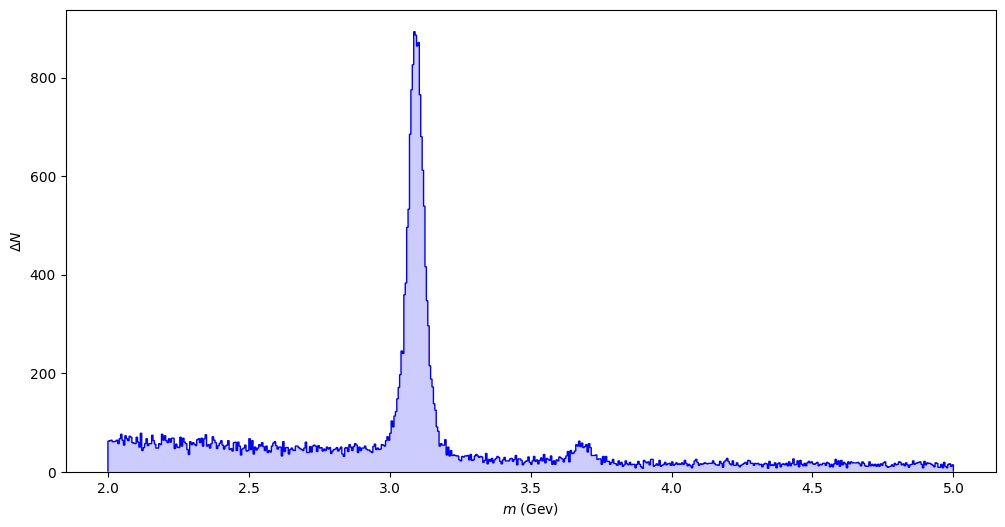

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
n_bins = 600
x_range = (2.0, 5.0)
data_y, bins, patches = ax.hist(df.M, n_bins, range=x_range, density=False, 
    histtype=u'step', edgecolor='b', linewidth=1, label='histogram')
ax.hist(df.M, n_bins, range=x_range, density=False, color='b', alpha=0.2)
plt.xlabel(r'$m$ (Gev)')
plt.ylabel(r'$\Delta N$')
plt.show()

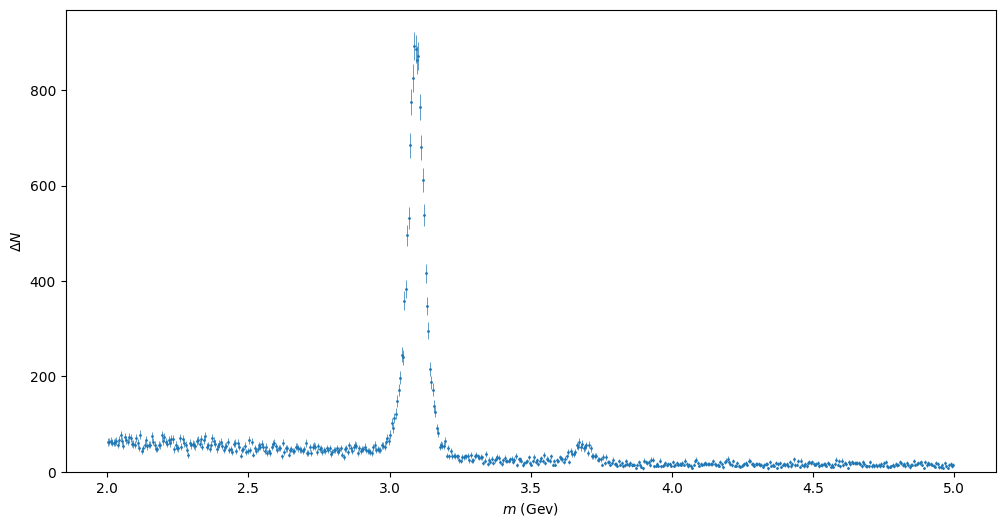

In [21]:
data_x = (bins[1:] + bins[:-1])/2
delta_x = bins[1] - bins[0]
data_yerr = np.sqrt(data_y)
plt.figure(figsize=(12,6))
plt.errorbar(data_x, data_y, data_yerr, linewidth=0.5, fmt="o", markersize=1)
plt.xlabel(r'$m$ (Gev)')
plt.ylabel(r'$\Delta N$')
plt.ylim(0)
plt.show()

In [25]:
def bkg_pdf(x, l):
    return np.exp(-x/l)/l
def sig_pdf(x, mu, sigma):
    return np.exp(- ((x - mu) / sigma)**2 / 2)/math.sqrt(2 * math.pi * sigma**2)
def bkg_model(x, b, l):
    return b * bkg_pdf(x, l)*delta_x
def sig_model(x, s, mu, sigma):
    return s*sig_pdf(x, mu, sigma)*delta_x
def fit_model(x, b, l, s1, mu1, sigma1, s2, mu2, sigma2):
    return bkg_model(x, b, l) + sig_model(x, s1, mu1, sigma1) + sig_model(x, s2, mu2, sigma2)

In [26]:
least_squares_model = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_model)
m = Minuit(least_squares_model, 500, 100, 60, 3.1, 0.03, 2, 3.7, 0.03,
           name=("$B$", "$\lambda$", "$S_1$", "$\mu_1$", "$\sigma_1$", "$S_2$", "$\mu_2$", "$\sigma_2$"))

In [27]:
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1064 (χ²/ndof = 1.8)       │              Nfcn = 473              │
│ EDM = 2.37e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ 𝐵    │  76.6e3   │   1.3e3   │            │            │         │         │       │
│ 1 │ 𝜆    │   1.540   │   0.023   │            │            │         │         │       │
│ 2 │ 𝑆₁   │  12.44e3  │  0.12e3   │            │            │         │         │       │
│ 3 │ 𝜇₁   │  3.09293  │  0.00031  │            │            │         │         │       │
│ 4 │ 𝜎₁   │ 31.48e-3  │  0.31e-3  │            │            │         │         │       │
│ 5 │ 𝑆₂   │    454    │    34     │            │            │         │         │       │
│ 6 │ 𝜇₂   │  3.6837   │  0.0024   │            │            │         │         │       │
│ 7 │ 𝜎₂   │  0.0273   │  0.0021   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────────────────────────────────────────────────────────────────────────────────────────┐
│    │            𝐵            𝜆           𝑆₁           𝜇₁           𝜎₁           𝑆₂           𝜇₂           𝜎₂ │
├────┼─────────────────────────────────────────────────────────────────────────────────────────────────────────┤
│  𝐵 │     1.59e+06     -25.6582     -0.005e6   3.42202e-3 -15.76679e-3        1.6e3    19.239e-3    68.362e-3 │
│  𝜆 │     -25.6582      0.00054     -23.1e-3     -0.04e-6     -0.08e-6    -101.3e-3        -0e-6        -4e-6 │
│ 𝑆₁ │     -0.005e6     -23.1e-3     1.38e+04   -303.99e-6   4.36156e-3        0.1e3        20e-6     2.283e-3 │
│ 𝜇₁ │   3.42202e-3     -0.04e-6   -303.99e-6     9.76e-08     -0.01e-6     -3.33e-6            0           -0 │
│ 𝜎₁ │ -15.76679e-3     -0.08e-6   4.36156e-3     -0.01e-6     9.55e-08    181.33e-6            0      0.01e-6 │
│ 𝑆₂ │        1.6e3    -101.3e-3        0.1e3     -3.33e-6    181.33e-6     1.16e+03        76e-6    29.174e-3 │
│ 𝜇₂ │    19.239e-3        -0e-6        20e-6            0            0        76e-6     5.55e-06         0e-6 │
│ 𝜎₂ │    68.362e-3        -4e-6     2.283e-3           -0      0.01e-6    29.174e-3         0e-6     4.37e-06 │
└────┴─────────────────────────────────────────────────────────────────────────────────────────────────────────┘

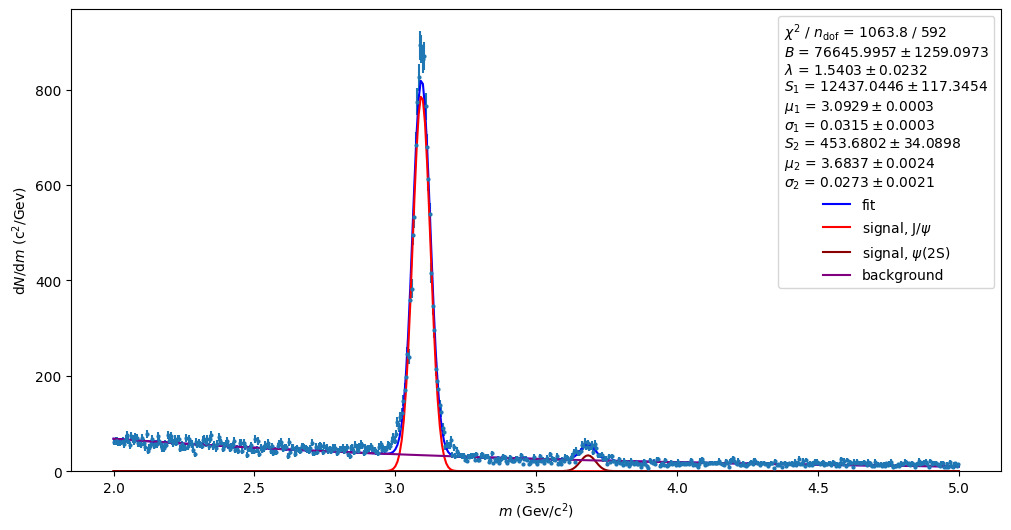

In [28]:
plt.figure(figsize=(12,6),dpi=100)
plt.errorbar(data_x, data_y, data_yerr, fmt="o", markersize=2)
plt.xlabel(r'$m$ (Gev/c$^2$)')
plt.ylabel(r'$\mathrm{d}N/\mathrm{d}m$ (c$^2$/Gev)')
data_x_f = np.linspace(bins[0], bins[-1], 400)
data_y_f = fit_model(data_x_f, *m.values)
bkg_y_f = bkg_model(data_x_f, *m.values[:2])
sig_y_f = sig_model(data_x_f, *m.values[2:5])
sig2_y_f = sig_model(data_x_f, *m.values[5:])
plt.plot(data_x_f, data_y_f, label="fit", color='blue')
plt.plot(data_x_f, sig_y_f, label="signal, J/$\psi$", color='red')
plt.plot(data_x_f, sig2_y_f, label="signal, $\psi$(2S)", color='darkred')
plt.plot(data_x_f, bkg_y_f, label="background", color='purple')
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(data_x) - m.nfit}" ]
for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")
plt.legend(title="\n".join(fit_info))
plt.ylim(0)
plt.show()

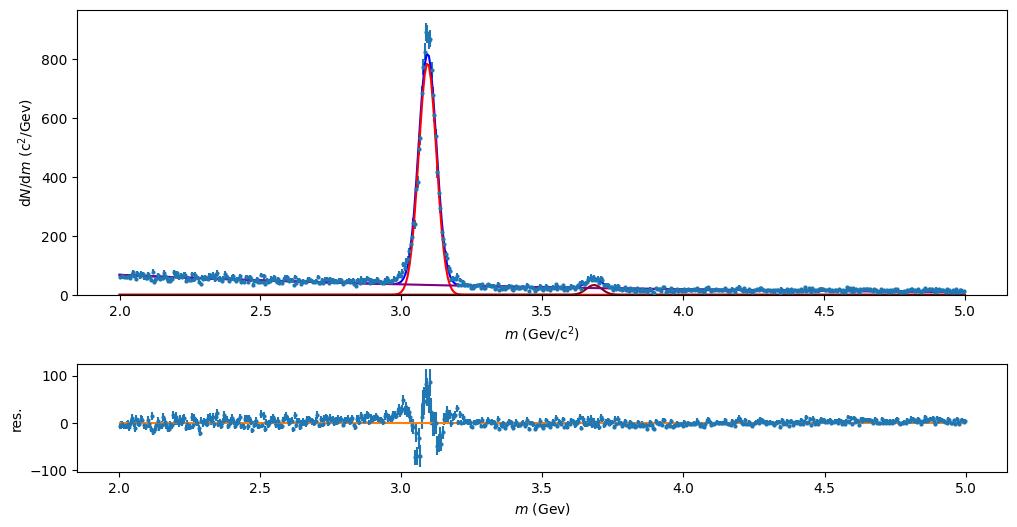

In [29]:
import matplotlib.gridspec as gridspec
plt.figure(figsize=(12,6),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o", markersize=2)
ax0.plot(data_x_f, data_y_f, label="fit", color='blue')
ax0.plot(data_x_f, sig_y_f, label="signal, J/$\psi$", color='red')
ax0.plot(data_x_f, sig2_y_f, label="signal, $\psi$(2S)", color='darkred')
ax0.plot(data_x_f, bkg_y_f, label="background", color='purple')
ax0.set_xlabel(r'$m$ (Gev/c$^2$)')
ax0.set_ylabel(r'$\mathrm{d}N/\mathrm{d}m$ (c$^2$/Gev)')
ax1.errorbar(data_x, data_y-fit_model(data_x, *m.values), data_yerr, fmt="o", markersize=2)
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel(r'$m$ (Gev)')
ax1.set_ylabel('res.')
ax0.set_ylim(0)
plt.show()

In [31]:
from scipy.stats import crystalball

In [38]:
def sig_cb_pdf(x, mu, sigma, beta, alpha):
    return crystalball.pdf(x, beta, alpha, loc=mu, scale=sigma)
def sig_cb_model(x, s, mu, sigma, beta, alpha):
    return s*sig_cb_pdf(x, mu, sigma, beta, alpha)*delta_x
def fit_cb_model(x, b, l, s1, mu1, sigma1, s2, mu2, sigma2, beta, alpha):
    return bkg_model(x, b, l) + sig_cb_model(x, s1, mu1, sigma1, beta, alpha) + sig_cb_model(x, s2, mu2, sigma2, beta, alpha)

In [39]:
least_squares_model_cb = LeastSquares(data_x[data_y>0], data_y[data_y>0], data_yerr[data_y>0], fit_cb_model)
m_cb = Minuit(least_squares_model_cb, *(m.values), 1, 1.5,
           name=("$B$", "$\lambda$", "$S_1$", "$\mu_1$", "$\sigma_1$", "$S_2$", "$\mu_2$", "$\sigma_2$", r"$\beta$", r"$\alpha$"))

In [40]:
m_cb.migrad()
m_cb.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 896.3 (χ²/ndof = 1.5)      │             Nfcn = 3975              │
│ EDM = 3.49e-05 (Goal: 0.0002)    │            time = 2.2 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ 𝐵    │  72.8e3   │   1.7e3   │   -2.0e3   │   1.9e3    │         │         │       │
│ 1 │ 𝜆    │   1.566   │   0.029   │   -0.029   │   0.031    │         │         │       │
│ 2 │ 𝑆₁   │  13.27e3  │  0.29e3   │  -0.27e3   │   0.51e3   │         │         │       │
│ 3 │ 𝜇₁   │  3.09368  │  0.00033  │  -0.00033  │  0.00036   │         │         │       │
│ 4 │ 𝜎₁   │  30.2e-3  │  0.4e-3   │  -0.4e-3   │   0.4e-3   │         │         │       │
│ 5 │ 𝑆₂   │    490    │    40     │    -40     │     40     │         │         │       │
│ 6 │ 𝜇₂   │  3.6842   │  0.0023   │  -0.0023   │   0.0023   │         │         │       │
│ 7 │ 𝜎₂   │  0.0270   │  0.0020   │  -0.0020   │   0.0022   │         │         │       │
│ 8 │ 𝛽    │   1.70    │   0.10    │   -0.14    │    0.12    │         │         │       │
│ 9 │ 𝛼    │    1.8    │    0.4    │    -0.4    │    0.7     │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┬───────────────────────┐
│          │           𝐵           │           𝜆           │          𝑆₁           │          𝜇₁           │          𝜎₁           │          𝑆₂           │          𝜇₂           │          𝜎₂           │           𝛽           │           𝛼           │
├──────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -2.0e3   │   1.9e3   │  -0.029   │   0.031   │  -0.27e3  │  0.51e3   │ -0.33e-3  │  0.36e-3  │  -0.4e-3  │  0.4e-3   │    -40    │    40     │  -0.0023  │  0.0023   │  -0.0020  │  0.0022   │   -0.14   │   0.12    │   -0.4    │    0.7    │
│  Valid   │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   Fals

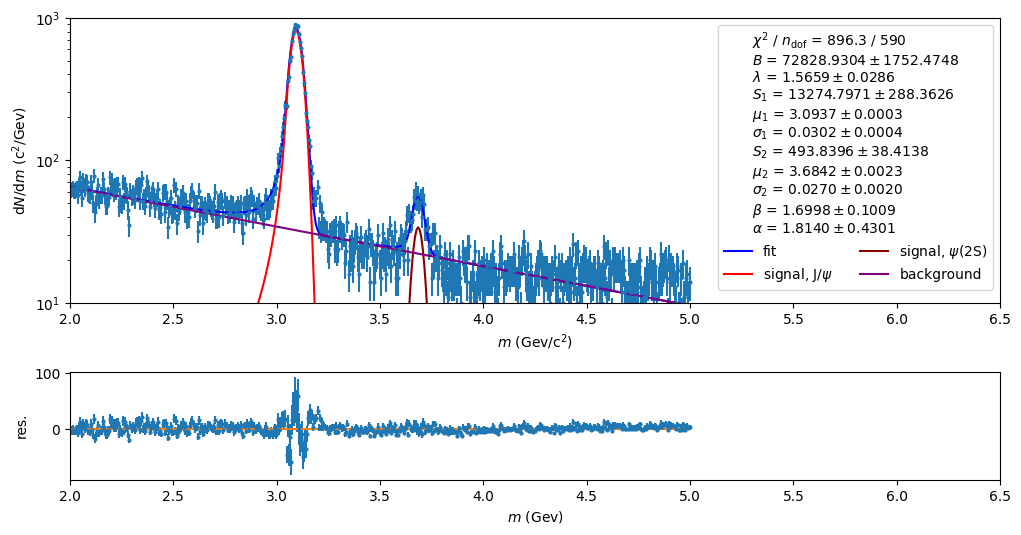

In [43]:
data_x_f = np.linspace(bins[0], bins[-1], 400)
b, l, s1, mu1, sigma1, s2, mu2, sigma2, r, alpha = m_cb.values
data_y_f = fit_cb_model(data_x_f, *m_cb.values)
bkg_y_f = bkg_model(data_x_f, b, l)
sig_y_f = sig_cb_model(data_x_f, s1, mu1, sigma1, r, alpha)
sig2_y_f = sig_cb_model(data_x_f, s2, mu2, sigma2, r, alpha)
plt.figure(figsize=(12,6),dpi=100)
gs = gridspec.GridSpec(8, 1)
ax0 = plt.subplot(gs[:5, :])
ax1 = plt.subplot(gs[6:, :])
ax0.errorbar(data_x, data_y, data_yerr, fmt="o", markersize=2)
ax0.plot(data_x_f, data_y_f, label="fit", color='blue')
ax0.plot(data_x_f, sig_y_f, label="signal, J/$\psi$", color='red')
ax0.plot(data_x_f, sig2_y_f, label="signal, $\psi$(2S)", color='darkred')
ax0.plot(data_x_f, bkg_y_f, label="background", color='purple')
ax0.set_xlabel(r'$m$ (Gev/c$^2$)')
ax0.set_ylabel(r'$\mathrm{d}N/\mathrm{d}m$ (c$^2$/Gev)')
fit_info = [ f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_cb.fval:.1f} / {len(data_x) - m_cb.nfit}" ]
for p, v, e in zip(m_cb.parameters, m_cb.values, m_cb.errors):
    fit_info.append(f"{p} = ${v:.4f} \\pm {e:.4f}$")
ax0.legend(title="\n".join(fit_info), ncol=2)
ax1.errorbar(data_x, data_y - fit_cb_model(data_x, *m_cb.values), data_yerr, fmt="o", markersize=2)
ax1.plot([data_x[0],data_x[-1]], [0,0])
ax1.set_xlabel(r'$m$ (Gev)')
ax1.set_ylabel('res.')
ax0.set_yscale("log")
ax0.set_ylim(10, 1000)
ax0.set_xlim(2, 6.5)
ax1.set_xlim(2, 6.5)
plt.show()